In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
df = pd.read_csv(r"twitter_training.csv",names=cols)

In [6]:
df.head()


,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
df['Sentiment'].unique()


array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [8]:
df.isnull().sum()


ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [10]:
df.dropna(inplace=True)


In [11]:
df.isnull().sum()


ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [12]:
df.duplicated().sum()


2340

In [13]:
df.drop_duplicates(inplace=True)


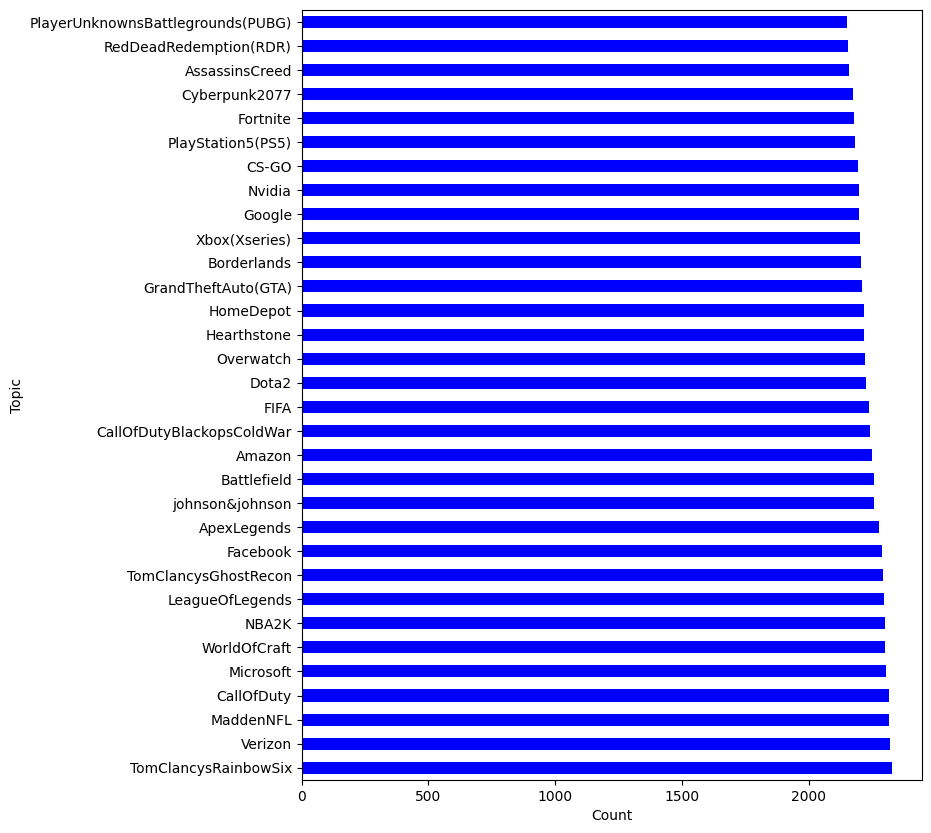

In [14]:
plt.figure(figsize=(8,10))
df['Topic'].value_counts().plot(kind='barh',color='b')
plt.xlabel("Count")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6728\699108144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=train,palette='coolwarm')


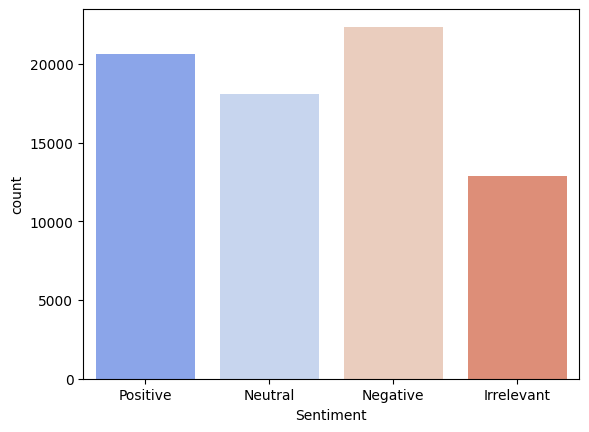

In [15]:
sns.countplot(x = 'Sentiment',data=train,palette='coolwarm')
plt.show()

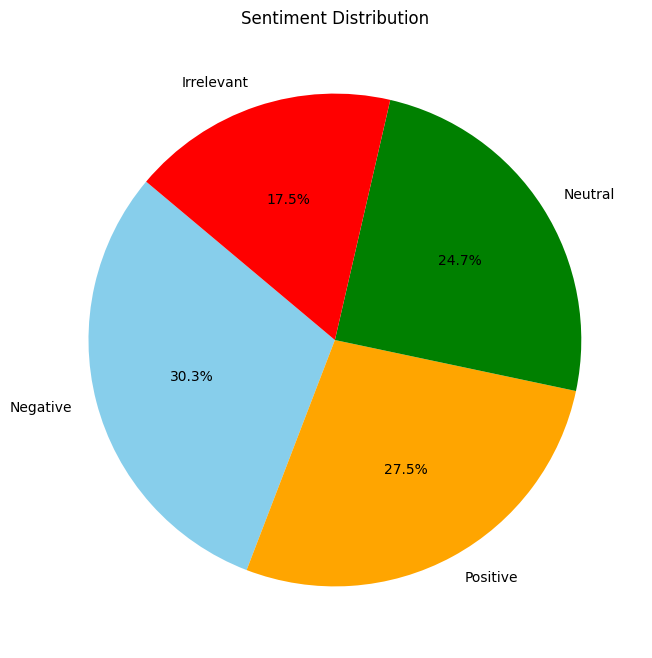

In [16]:
# Calculate the counts for each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

In [19]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_6728\42708779.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')


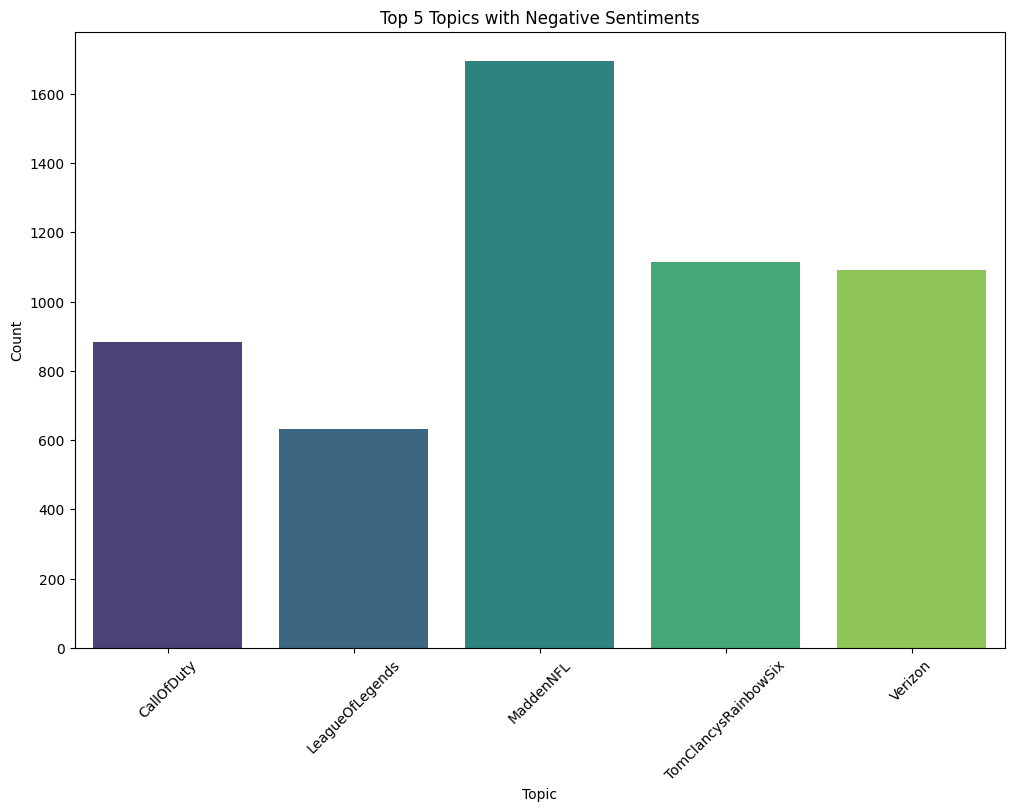

In [20]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='viridis')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

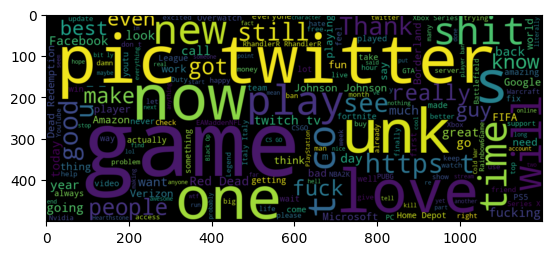

In [22]:
corpus = ' '.join(train['Text'])

wc2 = WordCloud(width=1200, height=500).generate(corpus)

plt.imshow(wc2, interpolation='bilinear')